In [1]:
import pandas as pd
import numpy as np 
import matplotlib.pyplot as plt 
import seaborn as sns

In [2]:
df = pd.read_csv('df.csv')
df.head()

,Used Date,From,To,Airline,Scheduled Departure,SDEP,Departure,DEP,Scheduled Arrival,SARR,...,Market Share,OTP Index,weather__hourly__windspeedKmph,weather__hourly__weatherDesc__value,weather__hourly__precipMM,weather__hourly__humidity,weather__hourly__visibility,weather__hourly__pressure,weather__hourly__cloudcover,Category
0,31-01-2020,DEL,HYD,Air Asia,06:05,605,06:04,604,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
1,31-01-2020,DEL,HYD,Indigo,04:50,450,04:36,436,07:00,700,...,47.5,81.1,11,Partly cloudy,0,90,9,1012,57,0
2,30-01-2020,DEL,HYD,Air Asia,06:05,605,05:54,554,08:15,815,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
3,30-01-2020,DEL,HYD,Air Asia,17:40,1740,17:40,1740,19:55,1955,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,0
4,30-01-2020,DEL,HYD,Air Asia,19:50,1950,19:54,1954,22:10,2210,...,5.3,85.6,11,Partly cloudy,0,90,9,1012,57,1


In [3]:
# Convert Date column to datetime format
df['Used Date'] = pd.to_datetime(df['Used Date'], errors='coerce', dayfirst=True)

# Convert time-related columns to numeric (assuming they are in HHMM format)
# Removing rows where conversion fails
df['SDEP'] = pd.to_numeric(df['SDEP'], errors='coerce')
df['DEP'] = pd.to_numeric(df['DEP'], errors='coerce')
df['SARR'] = pd.to_numeric(df['SARR'], errors='coerce')

# Dropping rows with NaN values in key columns after conversions
df.dropna(subset=['Used Date', 'SDEP', 'DEP', 'SARR'], inplace=True)

# Basic Info
print("Dataset Information:")
print(df.info())

Dataset Information:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10718 entries, 0 to 10717
Data columns (total 29 columns):
 #   Column                               Non-Null Count  Dtype         
---  ------                               --------------  -----         
 0   Used Date                            10718 non-null  datetime64[ns]
 1   From                                 10718 non-null  object        
 2   To                                   10718 non-null  object        
 3   Airline                              10718 non-null  object        
 4   Scheduled Departure                  10718 non-null  object        
 5   SDEP                                 10718 non-null  int64         
 6   Departure                            10718 non-null  object        
 7   DEP                                  10718 non-null  int64         
 8   Scheduled Arrival                    10718 non-null  object        
 9   SARR                                 10718 non-null  int64    

In [4]:
# Descriptive Statistics
print("\nDescriptive Statistics:")
print(df.describe())


Descriptive Statistics:
                           Used Date          SDEP           DEP  \
count                          10718  10718.000000  10718.000000   
mean   2019-12-03 16:15:48.535174400   1347.070349   1331.483486   
min              2019-01-02 00:00:00      5.000000     -1.000000   
25%              2019-11-15 00:00:00    730.000000    726.000000   
50%              2019-12-06 00:00:00   1320.000000   1259.000000   
75%              2019-12-28 00:00:00   2000.000000   2000.000000   
max              2020-01-31 00:00:00   2350.000000   2359.000000   
std                              NaN    642.298422    666.186884   

               SARR           ARR  Departure Delay  Arrival Delay  \
count  10718.000000  10718.000000     10718.000000   10718.000000   
mean    1320.709461   1260.562605        26.080892      27.628009   
min        5.000000     -1.000000       -60.000000     -61.000000   
25%      835.000000    754.250000         0.000000      -4.000000   
50%     1245.0000

In [5]:
# Check for Missing Values
print("\nMissing Values:")
print(df.isnull().sum())


Missing Values:
Used Date                              0
From                                   0
To                                     0
Airline                                0
Scheduled Departure                    0
SDEP                                   0
Departure                              0
DEP                                    0
Scheduled Arrival                      0
SARR                                   0
Arrival                                0
ARR                                    0
Departure Delay                        0
Arrival Delay                          0
Status                                 0
Distance                               0
Passenger Load Factor                  0
Airline Rating                         0
Airport Rating                         0
Market Share                           0
OTP Index                              0
weather__hourly__windspeedKmph         0
weather__hourly__weatherDesc__value    0
weather__hourly__precipMM              0

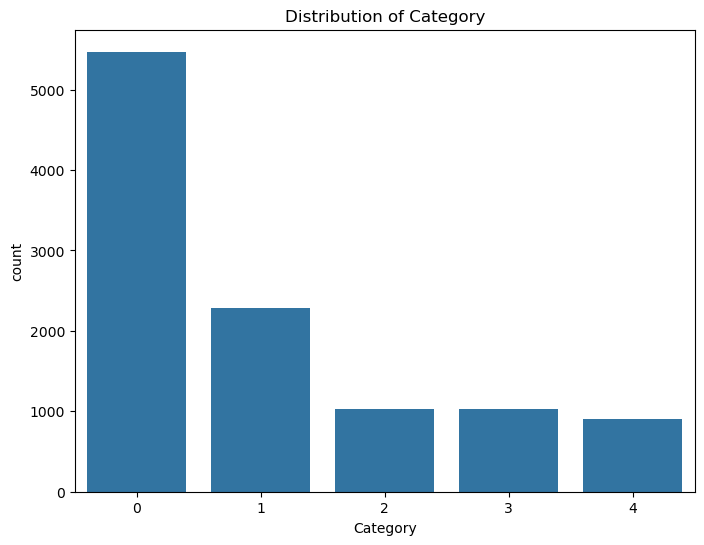

In [6]:
# Visualizations
# 1. Distribution of Category
plt.figure(figsize=(8, 6))
sns.countplot(x='Category', data=df)
plt.title("Distribution of Category")
plt.show()

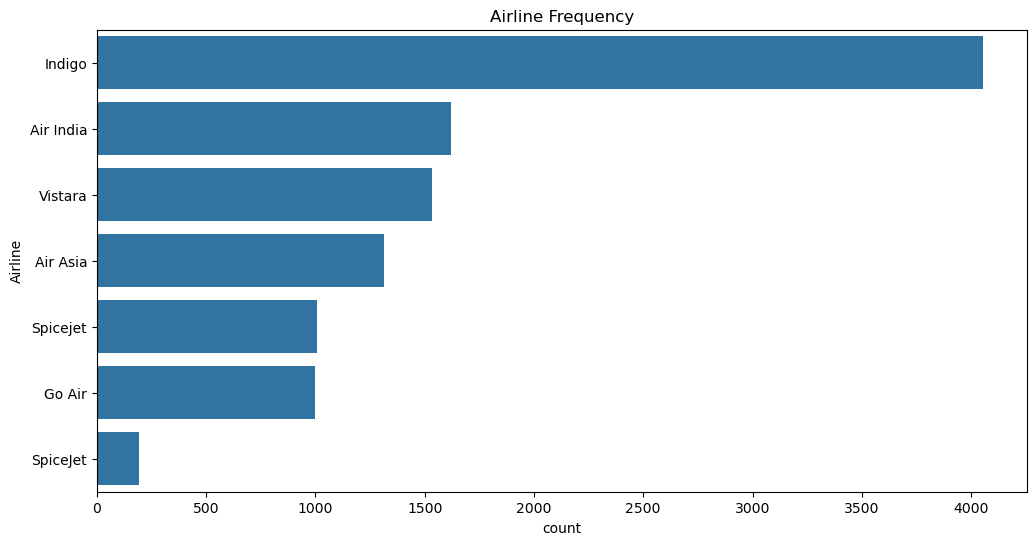

In [7]:
# 2. Airline Distribution
plt.figure(figsize=(12, 6))
sns.countplot(y='Airline', data=df, order=df['Airline'].value_counts().index)
plt.title("Airline Frequency")
plt.show()

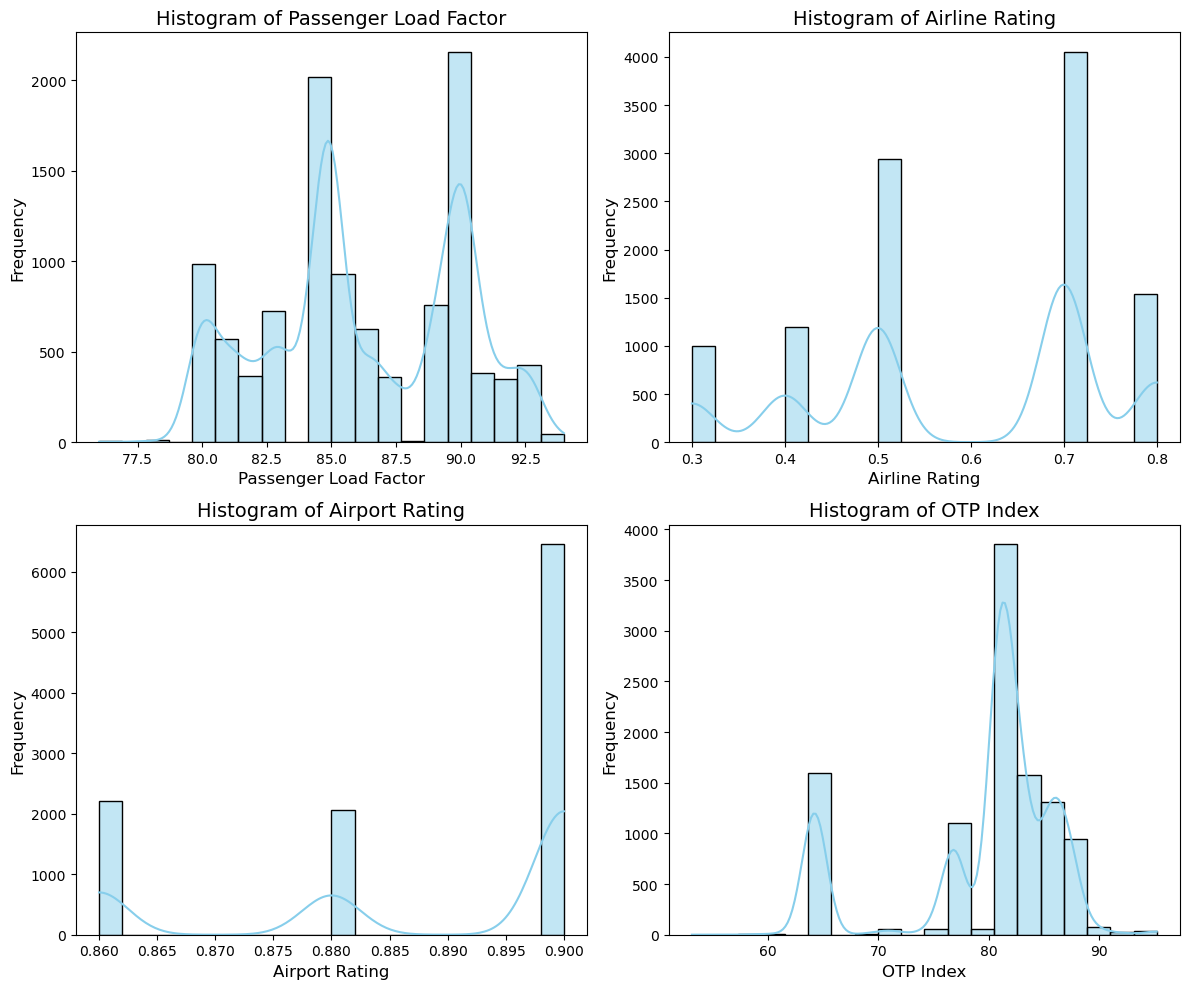

In [44]:
# Creating histograms for each of the specified features
features = ['Passenger Load Factor', 'Airline Rating', 'Airport Rating', 'OTP Index']

# Setting up the figure with subplots
plt.figure(figsize=(12, 10))

for i, feature in enumerate(features, 1):
    plt.subplot(2, 2, i)
    sns.histplot(df[feature].dropna(), bins=20, kde=True, color="skyblue", edgecolor="black")
    plt.title(f"Histogram of {feature}", fontsize=14)
    plt.xlabel(feature, fontsize=12)
    plt.ylabel("Frequency", fontsize=12)

plt.tight_layout()
plt.show()

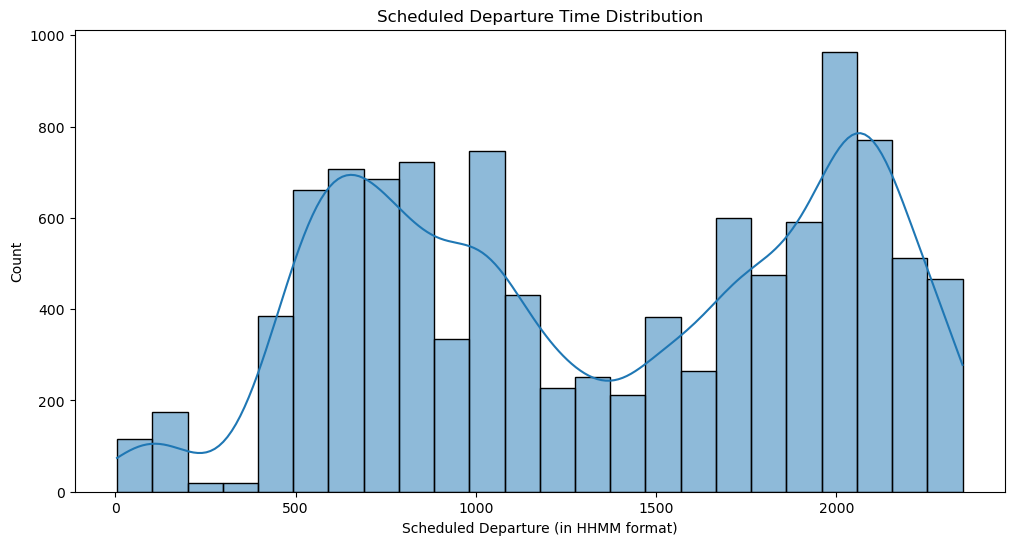

In [8]:
# 3. Distribution of Departure Times
plt.figure(figsize=(12, 6))
sns.histplot(df['SDEP'], bins=24, kde=True)
plt.title("Scheduled Departure Time Distribution")
plt.xlabel("Scheduled Departure (in HHMM format)")
plt.show()

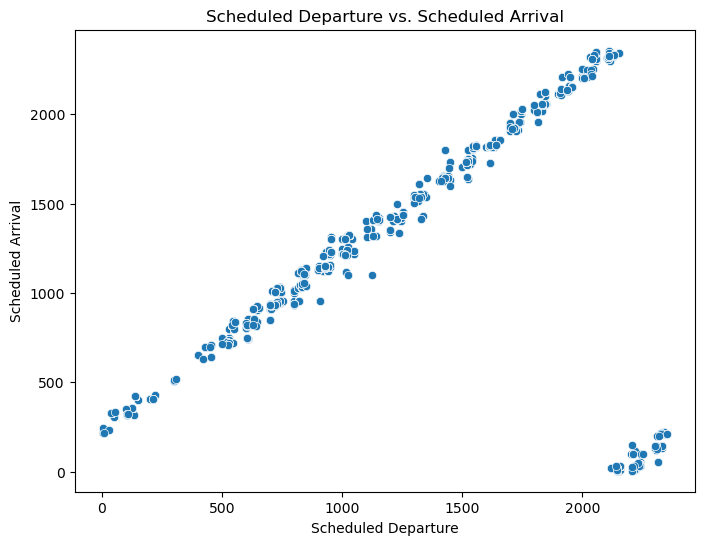

In [9]:
# 4. Scatter plot of Departure vs Arrival Times
plt.figure(figsize=(8, 6))
sns.scatterplot(x='SDEP', y='SARR', data=df)
plt.title("Scheduled Departure vs. Scheduled Arrival")
plt.xlabel("Scheduled Departure")
plt.ylabel("Scheduled Arrival")
plt.show()

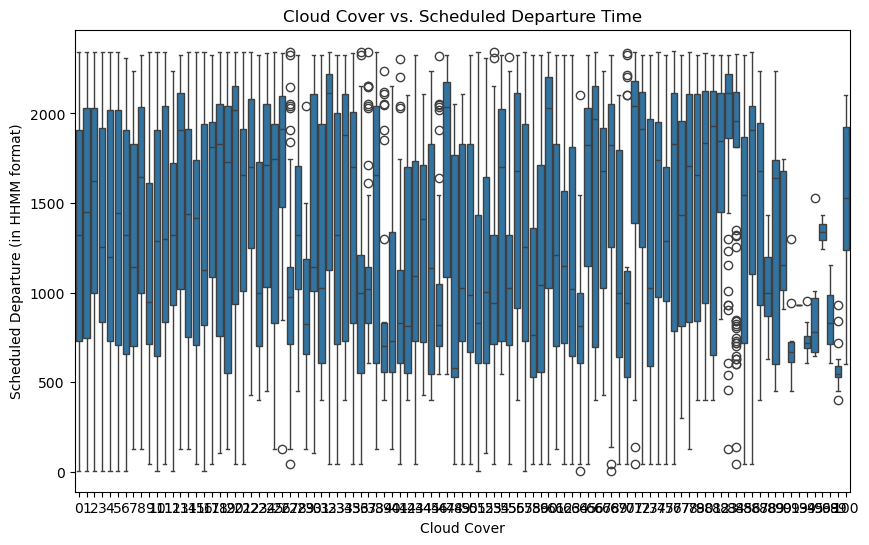

In [10]:
# 5. Weather Conditions vs. Departure Time
plt.figure(figsize=(10, 6))
sns.boxplot(x='weather__hourly__cloudcover', y='SDEP', data=df)
plt.title("Cloud Cover vs. Scheduled Departure Time")
plt.xlabel("Cloud Cover")
plt.ylabel("Scheduled Departure (in HHMM format)")
plt.show()

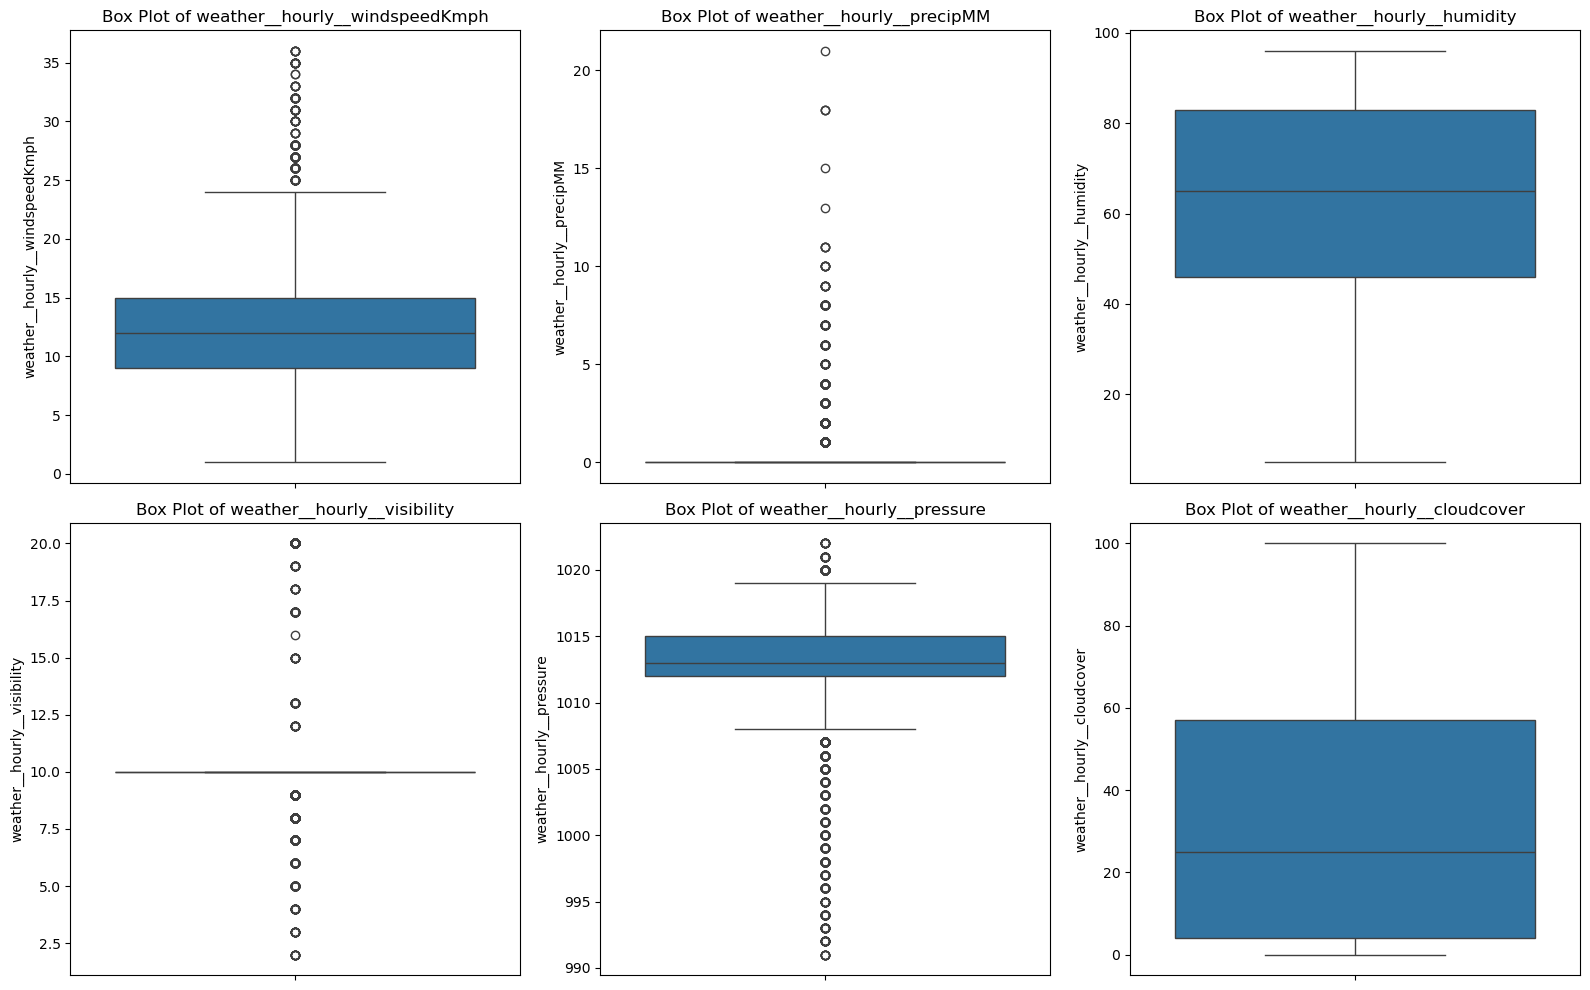

In [24]:
# Select weather-related features for box plots
weather_features = [
    'weather__hourly__windspeedKmph', 
    'weather__hourly__precipMM', 
    'weather__hourly__humidity', 
    'weather__hourly__visibility', 
    'weather__hourly__pressure', 
    'weather__hourly__cloudcover'
]

# Generate box plots for each weather-related feature
plt.figure(figsize=(16, 10))
for i, feature in enumerate(weather_features, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, y=feature)
    plt.title(f"Box Plot of {feature}")
    plt.ylabel(feature)

plt.tight_layout()
plt.show()


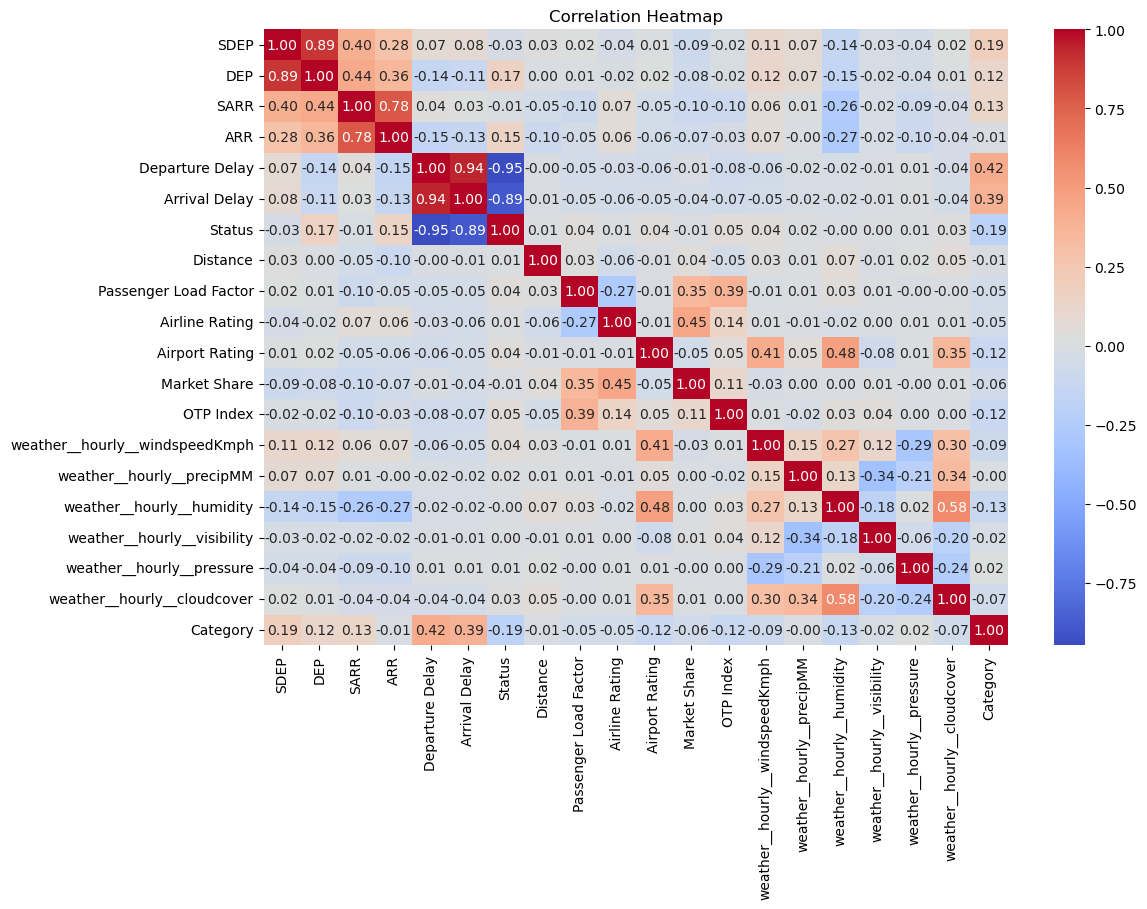

In [11]:
# Correlation Heatmap for Numeric Columns Only
plt.figure(figsize=(12, 8))
numeric_df = df.select_dtypes(include=['float64', 'int64'])
sns.heatmap(numeric_df.corr(), annot=True, fmt='.2f', cmap='coolwarm')
plt.title("Correlation Heatmap")
plt.show()

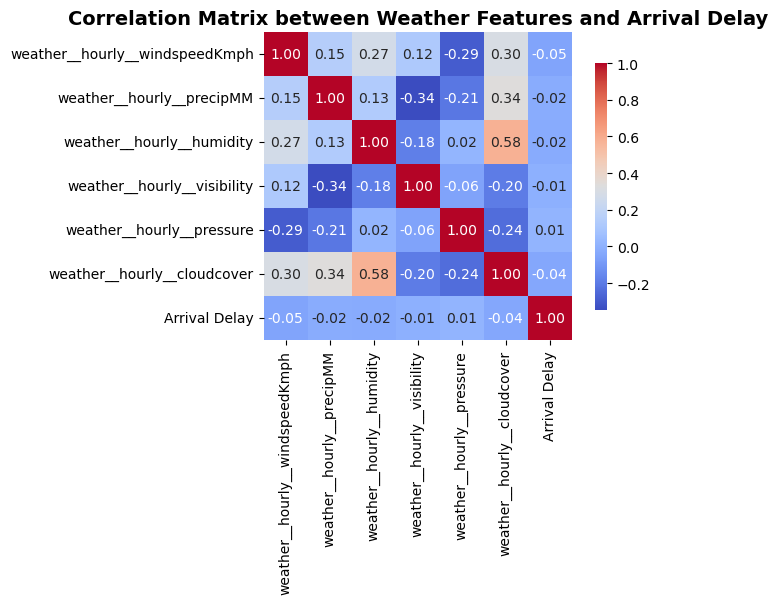

In [40]:
# Selecting weather-related features along with 'Arrival Delay'
weather_features = [
    'weather__hourly__windspeedKmph', 'weather__hourly__precipMM', 
    'weather__hourly__humidity', 'weather__hourly__visibility', 
    'weather__hourly__pressure', 'weather__hourly__cloudcover', 'Arrival Delay'
]
weather_df = df[weather_features].dropna()

# Calculating the correlation matrix
weather_correlation_matrix = weather_df.corr()

# Plotting the correlation matrix
plt.figure(figsize=(6, 4))
sns.heatmap(weather_correlation_matrix, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Correlation Matrix between Weather Features and Arrival Delay", fontsize=14, fontweight='bold')
plt.show()


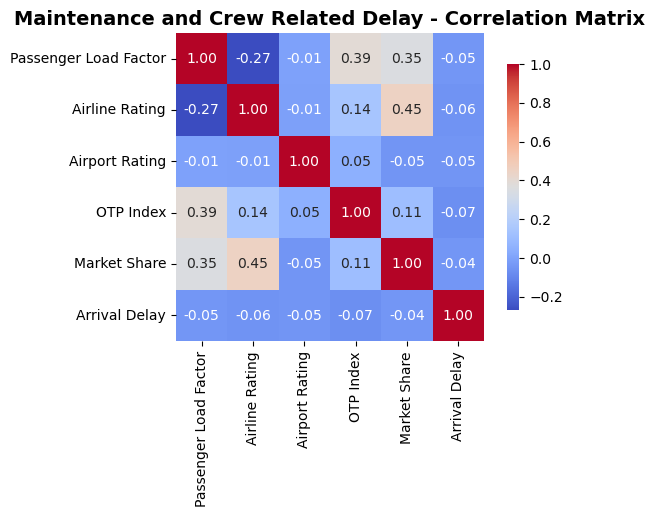

In [42]:
columns_of_interest = ['Passenger Load Factor', 'Airline Rating', 'Airport Rating', 'OTP Index', 'Market Share','Arrival Delay']
full_correlation_matrix = df[columns_of_interest].corr()

plt.figure(figsize=(6, 4))
sns.heatmap(full_correlation_matrix, annot=True, cmap="coolwarm", square=True, cbar_kws={'shrink': .8}, fmt=".2f")
plt.title("Maintenance and Crew Related Delay - Correlation Matrix", fontsize=14, fontweight='bold')
plt.show()

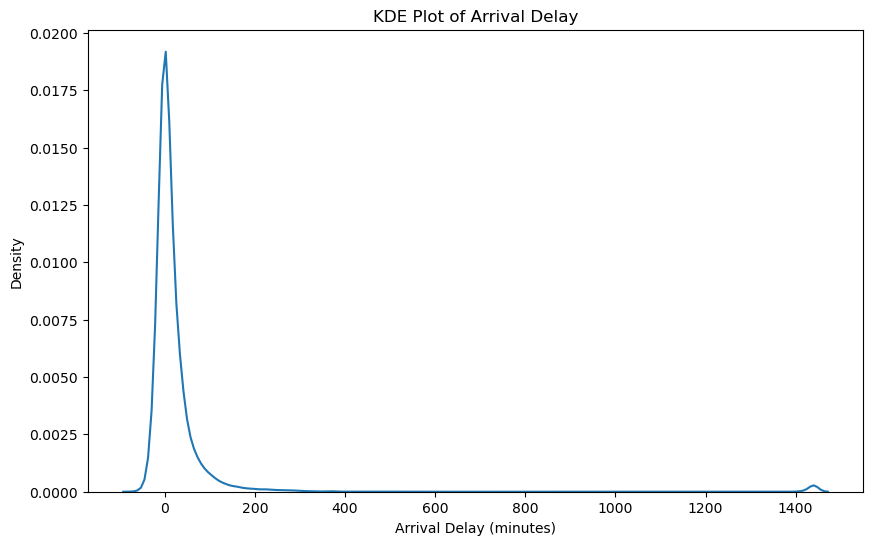

In [28]:
# Convert 'Arrival Delay' to a numeric type to handle any non-numeric values
df['Arrival Delay'] = pd.to_numeric(df['Arrival Delay'], errors='coerce')

# Plotting the KDE plot for 'Arrival Delay'
plt.figure(figsize=(10, 6))
sns.kdeplot(df['Arrival Delay'].dropna(), bw_adjust=0.5)
plt.title("KDE Plot of Arrival Delay")
plt.xlabel("Arrival Delay (minutes)")
plt.ylabel("Density")
plt.show()

C:\Users\rajbh\AppData\Local\Temp\ipykernel_19232\868304284.py:10: UserWarning: Ignoring `palette` because no `hue` variable has been assigned.
  sns.histplot(filtered_df['Arrival Delay'].dropna(), bins=30, kde=False, palette="plasma", edgecolor='black', alpha=0.8)


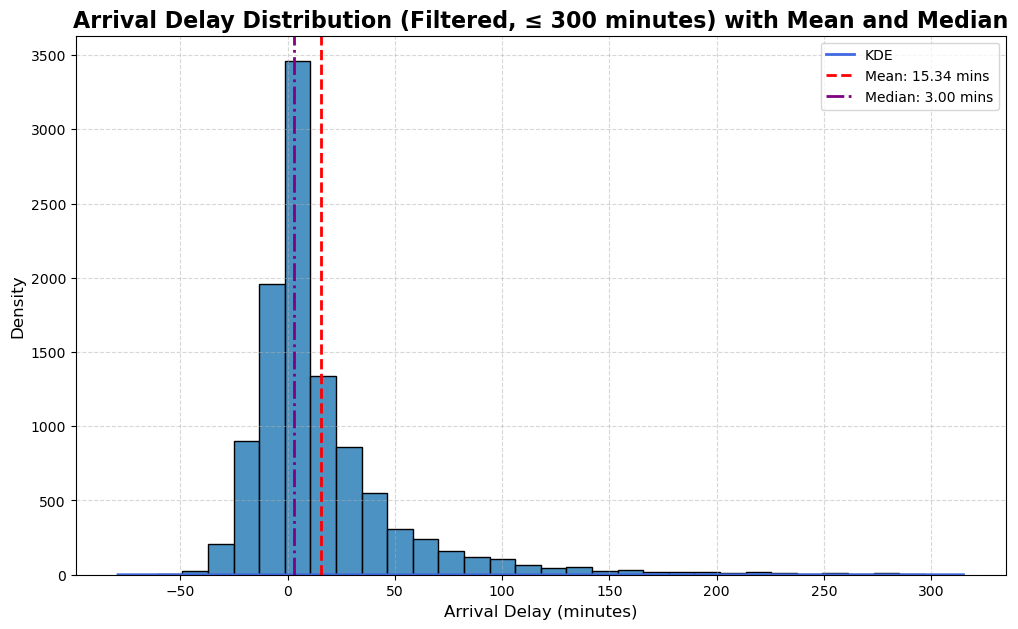

In [32]:
# Filter out values of 'Arrival Delay' above 300 minutes for a more focused analysis
filtered_df = df[df['Arrival Delay'] <= 300]

# Calculate the mean and median of 'Arrival Delay' for the filtered data
mean_arrival_delay = filtered_df['Arrival Delay'].mean()
median_arrival_delay = filtered_df['Arrival Delay'].median()

# Enhanced plot design with different colors for each bar and distinct colors for mean, median, and KDE line
plt.figure(figsize=(12, 7))
sns.histplot(filtered_df['Arrival Delay'].dropna(), bins=30, kde=False, palette="plasma", edgecolor='black', alpha=0.8)

# Overlay KDE line with a distinct color
sns.kdeplot(filtered_df['Arrival Delay'].dropna(), color='royalblue', lw=2, label="KDE")

# Add vertical lines for mean and median
plt.axvline(mean_arrival_delay, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_arrival_delay:.2f} mins')
plt.axvline(median_arrival_delay, color='purple', linestyle='-.', linewidth=2, label=f'Median: {median_arrival_delay:.2f} mins')

# Enhance plot details
plt.title("Arrival Delay Distribution (Filtered, ≤ 300 minutes) with Mean and Median", fontsize=16, fontweight='bold')
plt.xlabel("Arrival Delay (minutes)", fontsize=12)
plt.ylabel("Density", fontsize=12)
plt.legend()
plt.grid(True, linestyle='--', alpha=0.5)

plt.show()

C:\Users\rajbh\AppData\Local\Temp\ipykernel_19232\1924500100.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(data=df, x='Airline', y='Arrival Delay', palette="viridis")


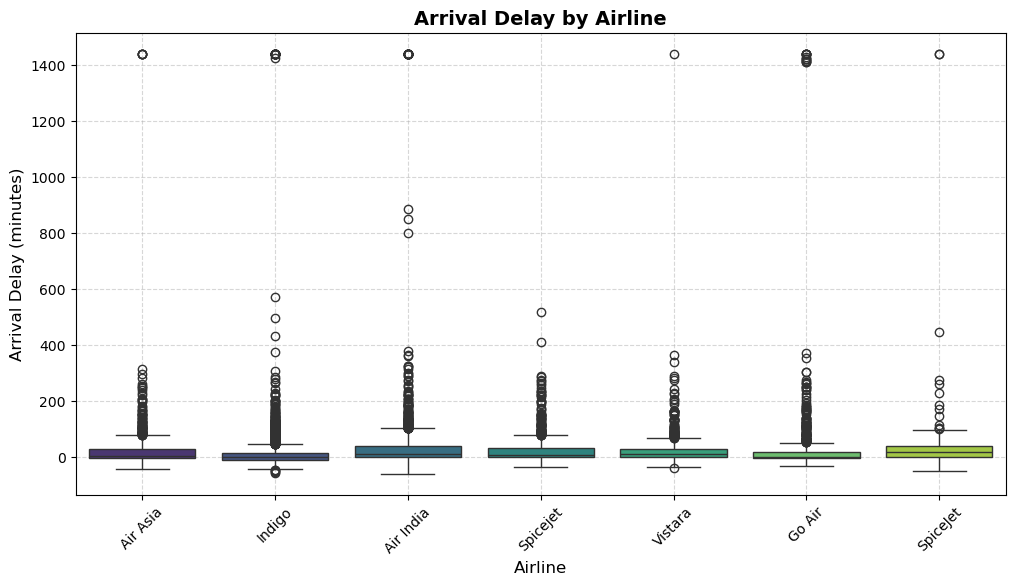

In [46]:
# Creating a relationship plot between 'Arrival Delay' and 'Airline'

plt.figure(figsize=(12, 6))
sns.boxplot(data=df, x='Airline', y='Arrival Delay', palette="viridis")
plt.title("Arrival Delay by Airline", fontsize=14, fontweight='bold')
plt.xlabel("Airline", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.xticks(rotation=45)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

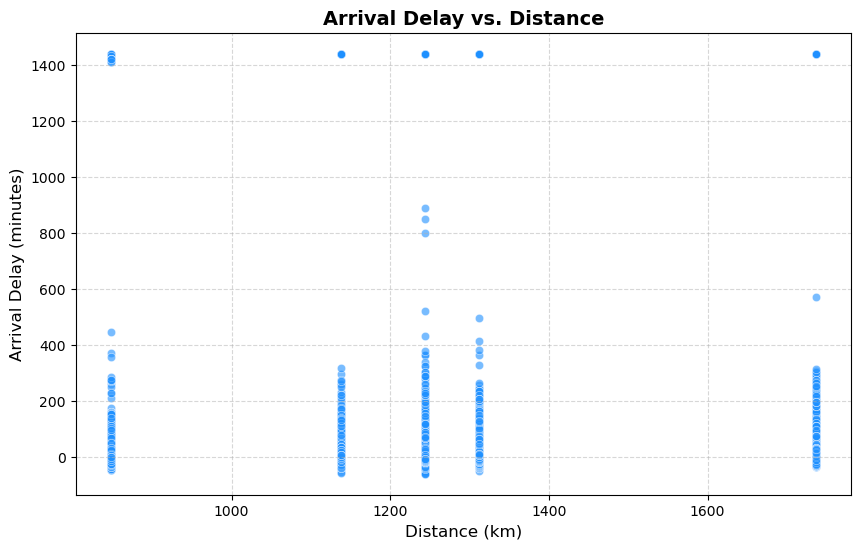

In [48]:
# Creating a scatter plot to show the relationship between 'Arrival Delay' and 'Distance'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Distance', y='Arrival Delay', color="dodgerblue", alpha=0.6)
plt.title("Arrival Delay vs. Distance", fontsize=14, fontweight='bold')
plt.xlabel("Distance (km)", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

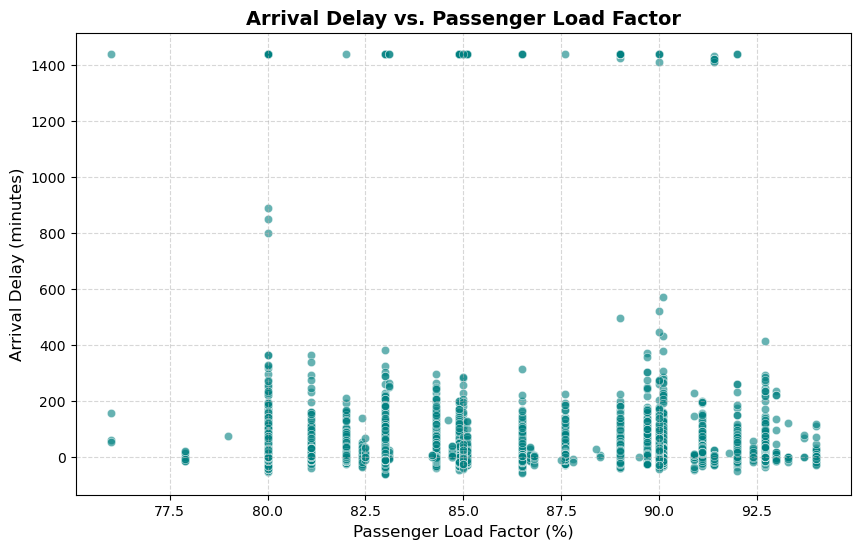

In [50]:
# Creating a scatter plot to show the relationship between 'Arrival Delay' and 'Passenger Load Factor'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Passenger Load Factor', y='Arrival Delay', color="teal", alpha=0.6)
plt.title("Arrival Delay vs. Passenger Load Factor", fontsize=14, fontweight='bold')
plt.xlabel("Passenger Load Factor (%)", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

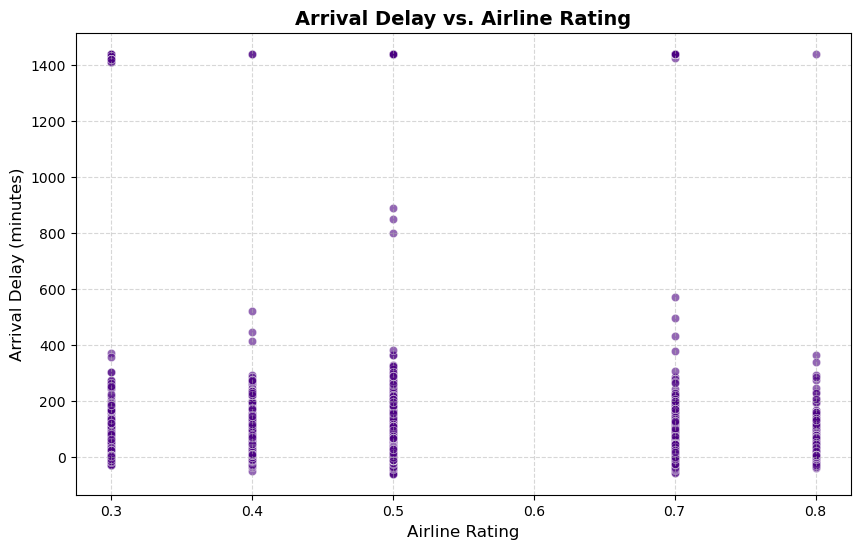

In [52]:
# Creating a scatter plot to show the relationship between 'Arrival Delay' and 'Airline Rating'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Airline Rating', y='Arrival Delay', color="indigo", alpha=0.6)
plt.title("Arrival Delay vs. Airline Rating", fontsize=14, fontweight='bold')
plt.xlabel("Airline Rating", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

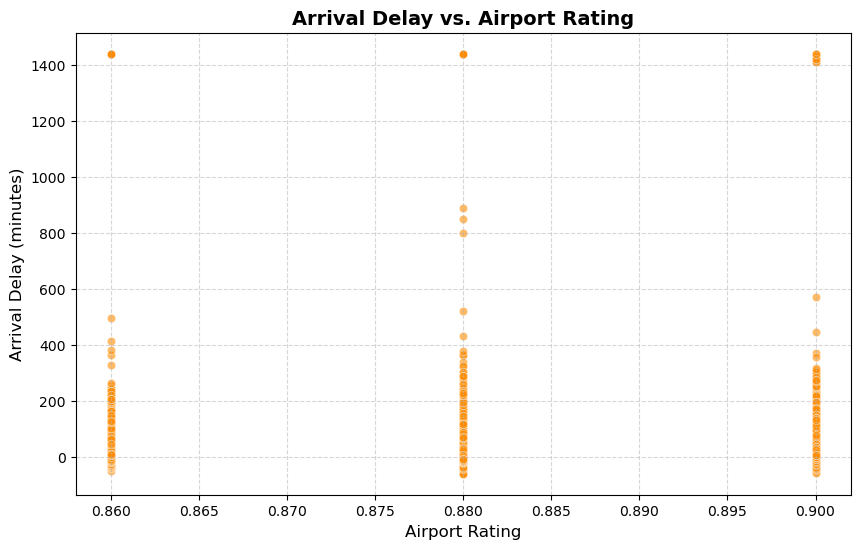

In [54]:
# Creating a scatter plot to show the relationship between 'Arrival Delay' and 'Airport Rating'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='Airport Rating', y='Arrival Delay', color="darkorange", alpha=0.6)
plt.title("Arrival Delay vs. Airport Rating", fontsize=14, fontweight='bold')
plt.xlabel("Airport Rating", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

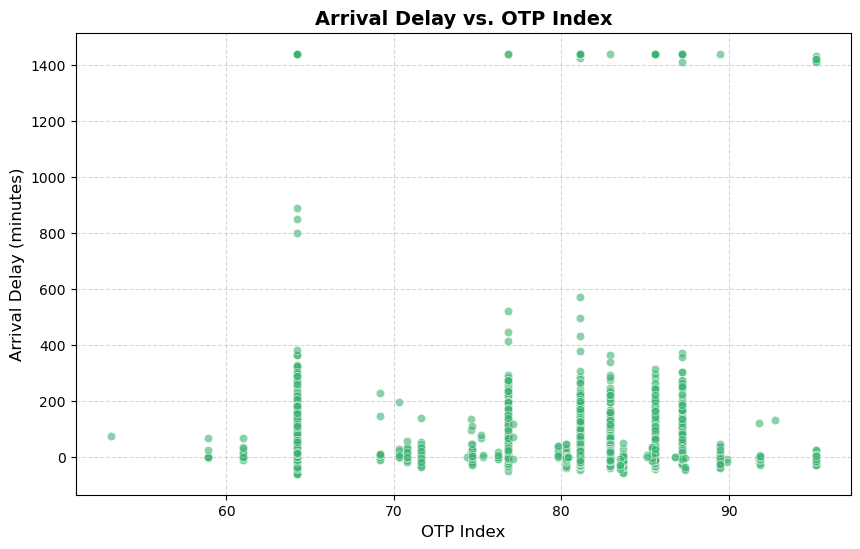

In [56]:
# Creating a scatter plot to show the relationship between 'Arrival Delay' and 'OTP Index'

plt.figure(figsize=(10, 6))
sns.scatterplot(data=df, x='OTP Index', y='Arrival Delay', color="mediumseagreen", alpha=0.6)
plt.title("Arrival Delay vs. OTP Index", fontsize=14, fontweight='bold')
plt.xlabel("OTP Index", fontsize=12)
plt.ylabel("Arrival Delay (minutes)", fontsize=12)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

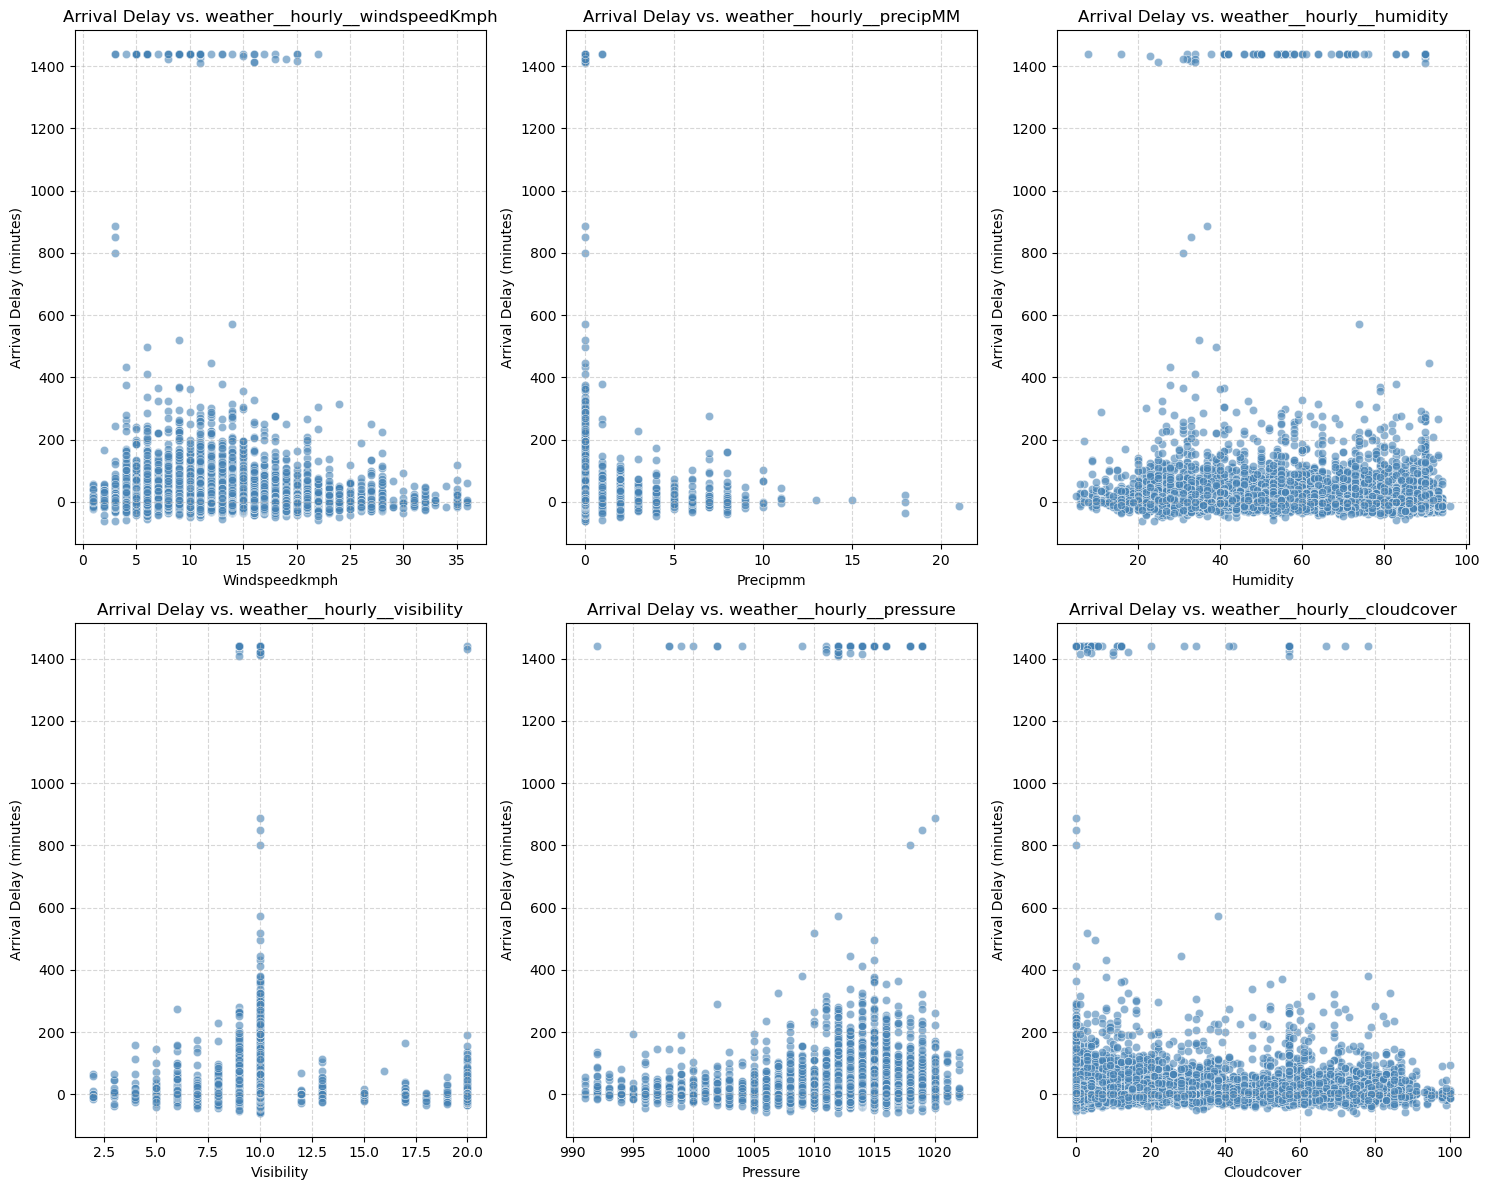

In [58]:
# Selecting weather-related features to analyze their relationship with 'Arrival Delay'
weather_features = [
    'weather__hourly__windspeedKmph', 'weather__hourly__precipMM', 
    'weather__hourly__humidity', 'weather__hourly__visibility', 
    'weather__hourly__pressure', 'weather__hourly__cloudcover'
]

# Setting up the figure with subplots for each weather-related feature
plt.figure(figsize=(15, 12))

for i, feature in enumerate(weather_features, 1):
    plt.subplot(2, 3, i)
    sns.scatterplot(data=df, x=feature, y='Arrival Delay', color="steelblue", alpha=0.6)
    plt.title(f"Arrival Delay vs. {feature}", fontsize=12)
    plt.xlabel(feature.replace('weather__hourly__', '').capitalize(), fontsize=10)
    plt.ylabel("Arrival Delay (minutes)", fontsize=10)
    plt.grid(True, linestyle='--', alpha=0.5)

plt.tight_layout()
plt.show()